<a href="https://colab.research.google.com/github/xGiannis/IntroModeladoContinuo/blob/main/ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # # Cargamos paquetes estándar para empezar a trabajar
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp
# # # Definimos la función campovector para el sistema dinámico


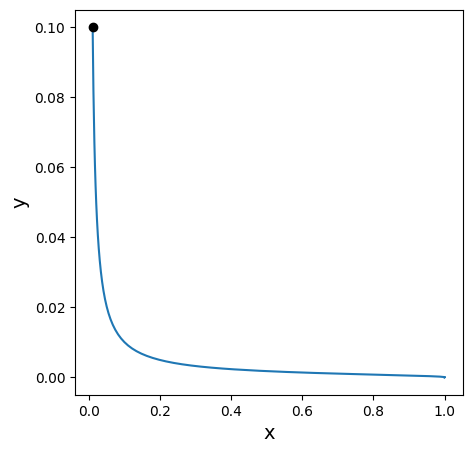

In [ ]:
def campo_vector(t,z):
  x=z[0]
  y=z[1]

  dxdt= x-x**3
  dydt=-y

  return [dxdt, dydt]



dt = 0.1
tmax = 50
t = np.arange(0, tmax, dt)
xi = 0.01
yi = 0.1
ti = t[0]
zi = [xi, yi]

sol = sp.integrate.solve_ivp(campo_vector, [t[0], t[-1]], zi, t_eval=t, method='RK45')

plt.figure(figsize=(5,5))
plt.plot(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

(24, 20)
[ 6.          3.9408077   2.35748651  1.19405161  0.39451815 -0.0970987
 -0.33678379 -0.38052194 -0.284298   -0.10409681  0.10409681  0.284298
  0.38052194  0.33678379  0.0970987  -0.39451815 -1.19405161 -2.35748651
 -3.9408077  -6.        ]


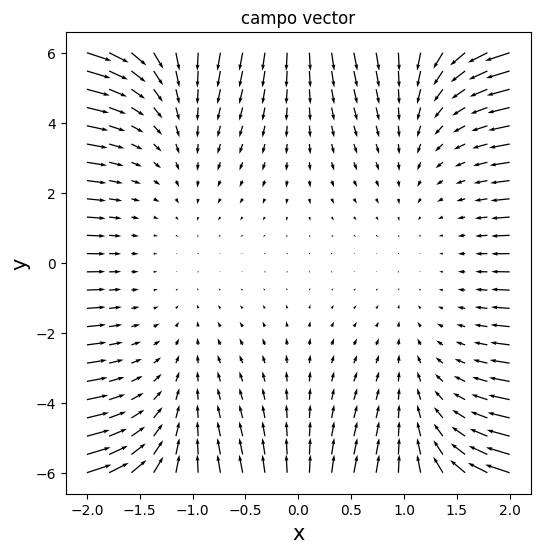

In [ ]:
# Damos la grilla de puntos sobre la que miraremos el campo vector
x_grilla, y_grilla = np.meshgrid(np.linspace(-2, 2, 20),np.linspace(-6, 6, 24))
dx_grilla, dy_grilla = campo_vector([x_grilla,y_grilla], 0)
print(np.shape(dx_grilla)) # For checking the shape
print(dx_grilla[0, :]) # Check the first row, all columns



# Plotting the vector field using quiver from matplotlib
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("campo vector")
ax.quiver(x_grilla, y_grilla, dx_grilla, dy_grilla, color='k', angles='xy')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
plt.show()

In [2]:
# Definimos una grilla de puntos
XX, YY = np.meshgrid(np.arange(-2, 2, .01), np.arange(-4, 4, .01))

print(XX)
print(np.shape(XX))

[[-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 ...
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]]
(800, 400)


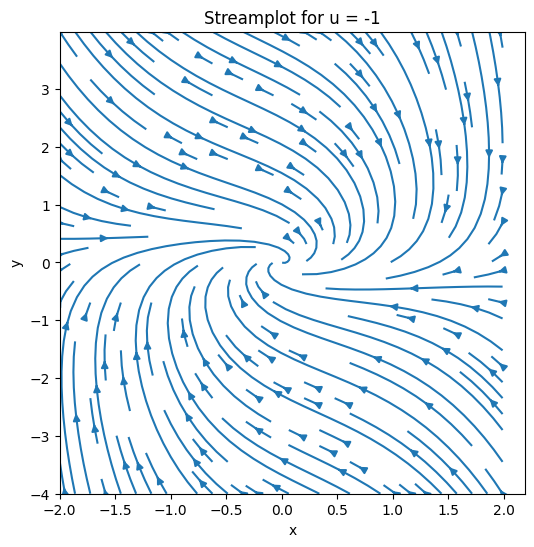

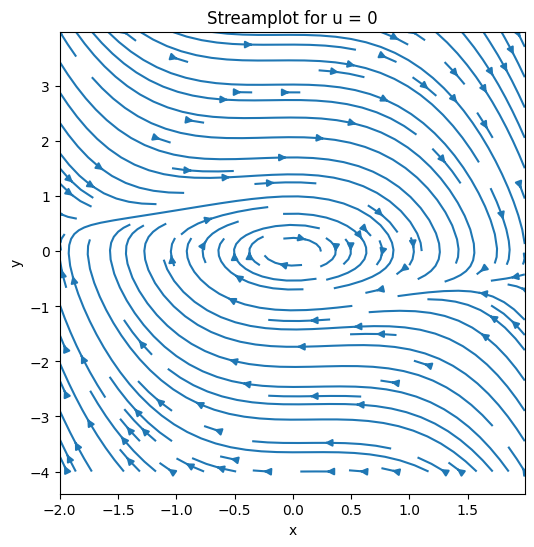

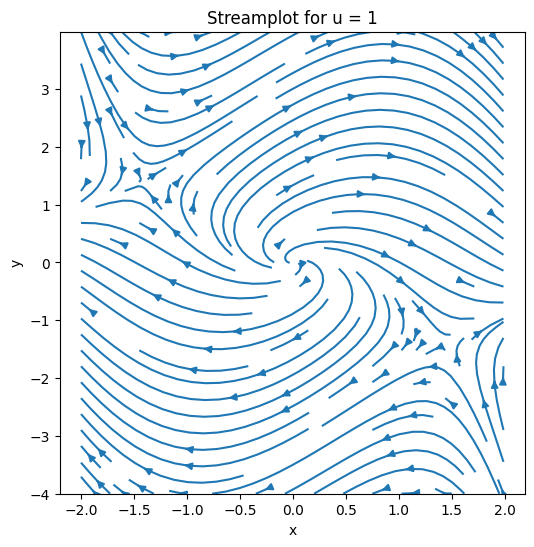

In [3]:
#ejercicio 14) BIFUCRACIONES HOPF

def campo_vector(t,z,u):
  x=z[0]
  y=z[1]

  dxdt= x*u + y
  dydt=-x + u*y - (x**2)*y

  return [dxdt, dydt]



dt = 0.1
tmax = 50
t = np.arange(0, tmax, dt)
xi = 0.01
yi = 0.1
ti = t[0]
zi = [xi, yi]

# Define the parameter u values to plot
u_values = [-1, 0, 1]

for u in u_values:
  # Calculamos el campo vector en cada punto
  DX, DY = campo_vector(0, [XX, YY], u)

  #Y finalmente graficamos
  plt.figure(figsize=(6,6))
  plt.streamplot(XX, YY, DX, DY, density=1, minlength=.01)
  plt.title(f'Streamplot for u = {u}')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

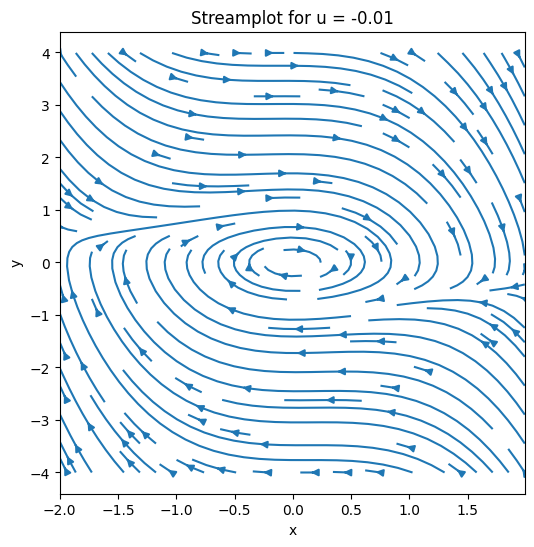

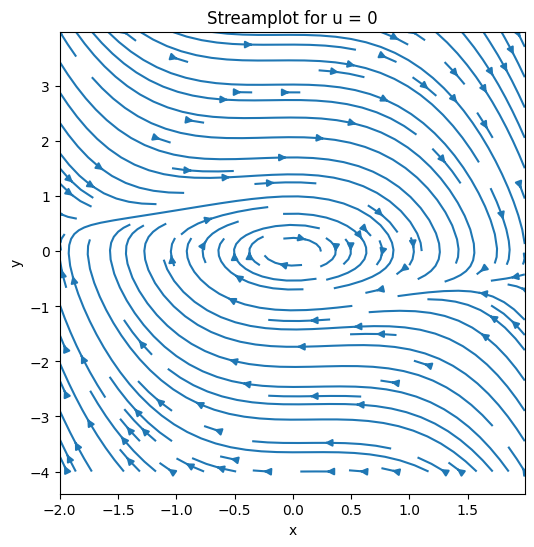

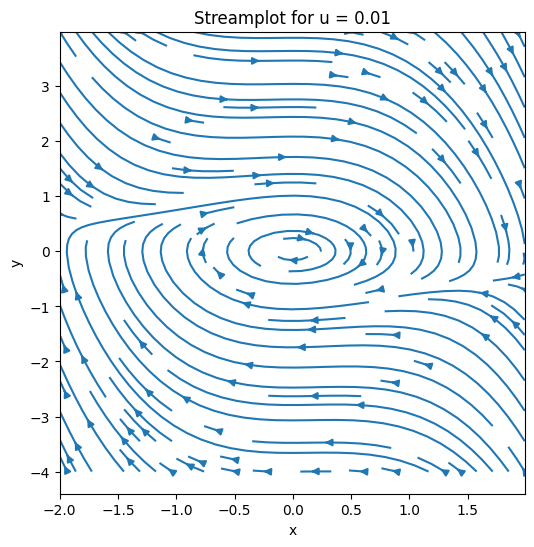

In [4]:
u_values = [-0.01, 0, 0.01]

for u in u_values:
  # Calculamos el campo vector en cada punto
  DX, DY = campo_vector(0, [XX, YY], u)

  #Y finalmente graficamos
  plt.figure(figsize=(6,6))
  plt.streamplot(XX, YY, DX, DY, density=1, minlength=.01)
  plt.title(f'Streamplot for u = {u}')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

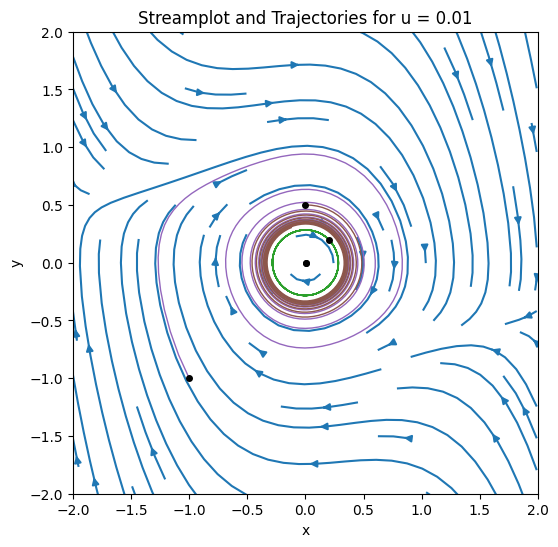

In [11]:
# Integrate a trajectory with smaller initial conditions for u = 0.01
u_test = 0.01
# Integrate multiple trajectories with small initial conditions
initial_conditions = [
    [0.001, 0.001],
    [0.2, 0.2],
    [0.001, -0.001],
    [-1, -1],
    [0, 0.5]
]


# Plot the streamplot for u = 0.01 again
plt.figure(figsize=(6,6))
DX, DY = campo_vector(0, [XX, YY], u_test)
plt.streamplot(XX, YY, DX, DY, density=1, minlength=.01)

# Plot the new trajectories on top of the streamplot
for xi_test, yi_test in initial_conditions:
  zi_test = [xi_test, yi_test]
  sol_test = sp.integrate.solve_ivp(lambda t, z: campo_vector(t, z, u_test), [t[0], t[-1]], zi_test, t_eval=t, method='RK45')
  plt.plot(sol_test.y[0, :], sol_test.y[1, :], linewidth=1)
  plt.plot(xi_test, yi_test, 'ko', markersize=4) # Mark the starting point with a small black circle

plt.title(f'Streamplot and Trajectories for u = {u_test}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-2, 2]) # Zoom in on the x-axis
plt.ylim([-2, 2]) # Zoom in on the y-axis
plt.show()

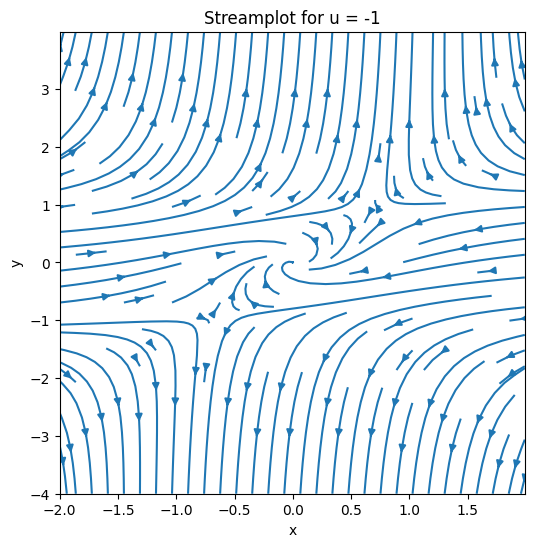

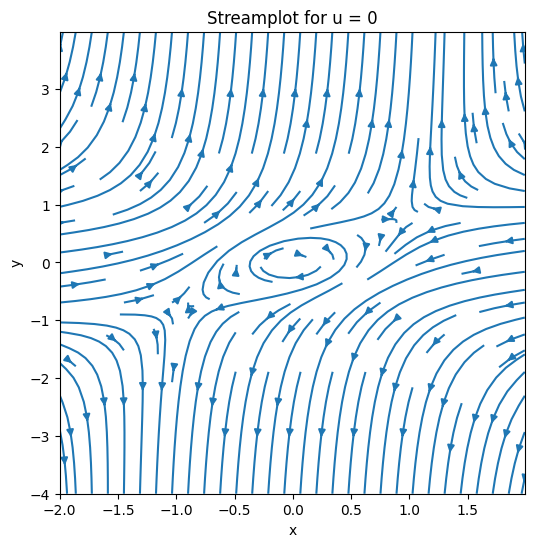

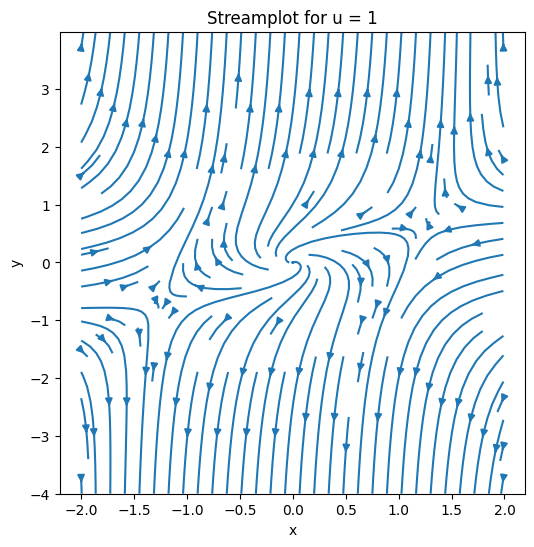

In [12]:
#B)

def campo_vector(t,z,u):
  x=z[0]
  y=z[1]

  dxdt= x*u + y - x**3
  dydt=-x + u*y + 2*(y**3)

  return [dxdt, dydt]



dt = 0.1
tmax = 50
t = np.arange(0, tmax, dt)
xi = 0.01
yi = 0.1
ti = t[0]
zi = [xi, yi]

# Define the parameter u values to plot
u_values = [-1, 0, 1]

for u in u_values:
  # Calculamos el campo vector en cada punto
  DX, DY = campo_vector(0, [XX, YY], u)

  #Y finalmente graficamos
  plt.figure(figsize=(6,6))
  plt.streamplot(XX, YY, DX, DY, density=1, minlength=.01)
  plt.title(f'Streamplot for u = {u}')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

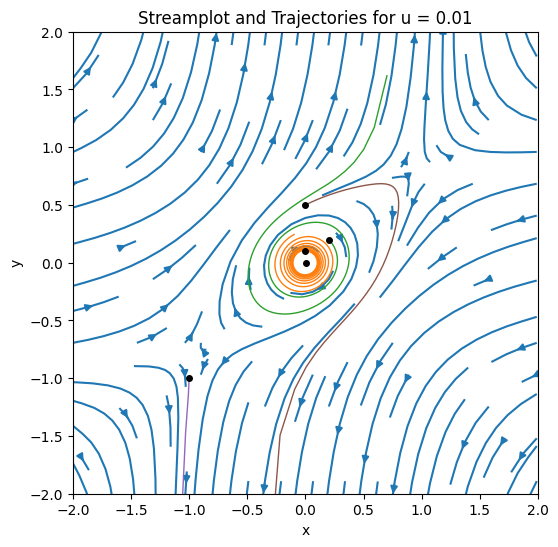

In [14]:
# Integrate a trajectory with smaller initial conditions for u = 0.01
u_test = 0.01
# Integrate multiple trajectories with small initial conditions
initial_conditions = [
    [0, 0.1],
    [0.2, 0.2],
    [0.001, -0.001],
    [-1, -1],
    [0, 0.5]
]


# Plot the streamplot for u = 0.01 again
plt.figure(figsize=(6,6))
DX, DY = campo_vector(0, [XX, YY], u_test)
plt.streamplot(XX, YY, DX, DY, density=1, minlength=.01)

# Plot the new trajectories on top of the streamplot
for xi_test, yi_test in initial_conditions:
  zi_test = [xi_test, yi_test]
  sol_test = sp.integrate.solve_ivp(lambda t, z: campo_vector(t, z, u_test), [t[0], t[-1]], zi_test, t_eval=t, method='RK45')
  plt.plot(sol_test.y[0, :], sol_test.y[1, :], linewidth=1)
  plt.plot(xi_test, yi_test, 'ko', markersize=4) # Mark the starting point with a small black circle

plt.title(f'Streamplot and Trajectories for u = {u_test}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-2, 2]) # Zoom in on the x-axis
plt.ylim([-2, 2]) # Zoom in on the y-axis
plt.show()

se va!